In [1]:
#I am first loading the dataset in into a pandas dataframe.
#Then I would drop the college variable because It has nothing
#to do what I want to accomplish in this model
import pandas as pd

df = pd.read_csv (r'all_seasons.csv')

df=df.drop(columns=['college'])

In [2]:
#Creating another dataframe of just the player_names and Player_ID
#to use later
df111=df[['player_name', 'PlayerID']] 


In [3]:
#Now dropping the player_names from the dataset
df=df.drop(columns=['player_name'])

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [5]:
#exploring the dataset by getting the types of each column
df.dtypes

PlayerID               int64
team_abbreviation     object
age                    int64
player_height        float64
player_weight        float64
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [6]:
#Checking to see if there is any duplicates in any row.
#So far, there are no duplicates, but I got rid of it in the next 
#code anyway
duplicate=df[df.duplicated()]
print("The number of duplicated rows: ", duplicate.shape)

The number of duplicated rows:  (0, 20)


In [7]:
df=df.drop_duplicates()

In [8]:
#Checking to see if there is any na's in the dataset
df.isnull().sum()

PlayerID             0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [9]:
#dropping any na's in the dataset
df=df.dropna()

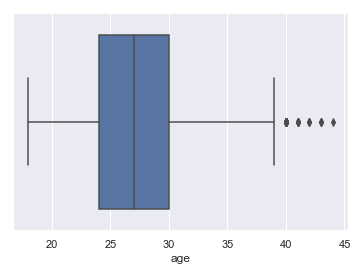

In [10]:
#The goal of the next boxplots is to see if there is any
#outliers in the dataset. For the age category, there were some
#outliers above 40 years old.
sns.boxplot(x=df['age'])

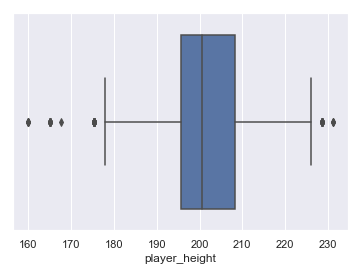

In [11]:
#Basketball Players are usually tall, so it is no suprise that
#this is skewed towards the higher side. However, there were some outliers
#for shorter players.
sns.boxplot(x=df['player_height'])

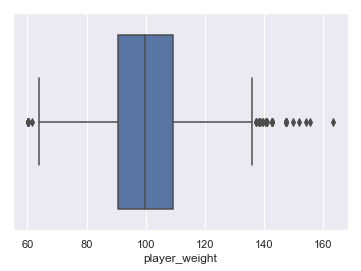

In [12]:
#There are also some outliers in the weight category above 140 kg.
sns.boxplot(x=df['player_weight'])

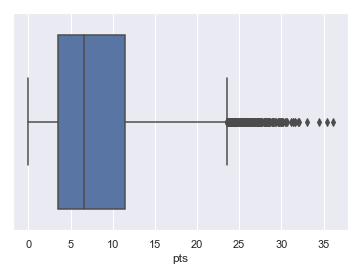

In [13]:
#There were a few outliers when it comes to points, which I plan
#on being the dependent variable in my model. I would get rid of the points per game o
#over 35
sns.boxplot(x=df['pts'])

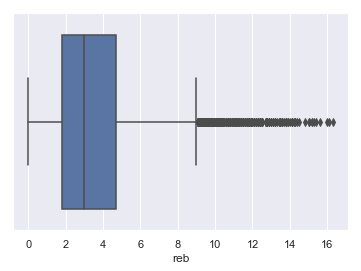

In [14]:
#For revound there is some outliers above 14 rebounds per game that I am looking o
#to get rid of
sns.boxplot(x=df['reb'])

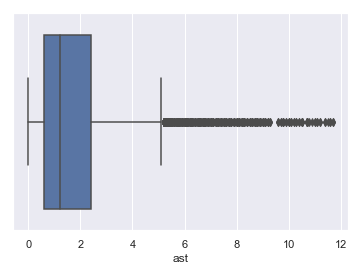

In [15]:
#assists has very few outliers and I do not know if we should be getting rid of any 
#at this time. However, we will see when it comes to the IQR
sns.boxplot(x=df['ast'])

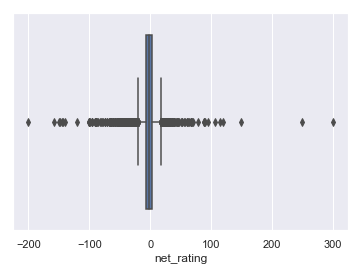

In [16]:
#Net Rating had two major outliers above 300, which may have been
#players who did not get that much playing time.
sns.boxplot(x=df['net_rating'])


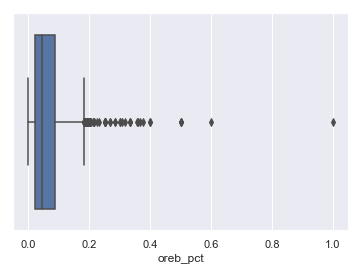

In [17]:
#oreb_pct has a few obvious outliers that we will
#look to getting rid of
sns.boxplot(x=df['oreb_pct'])

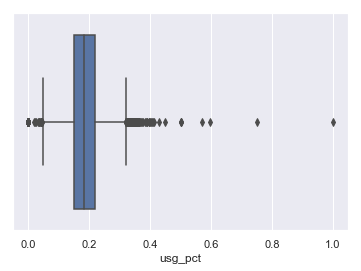

In [18]:
#usg_pct has a few obvious outliers that we will
#look to getting rid of
sns.boxplot(x=df['usg_pct'])


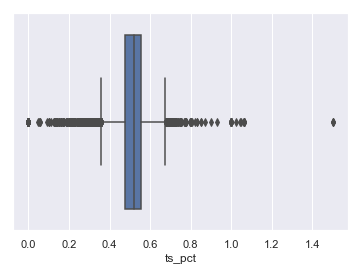

In [19]:
#ts_pct has a on outliers that we will
#look to getting rid of
sns.boxplot(x=df['ts_pct'])


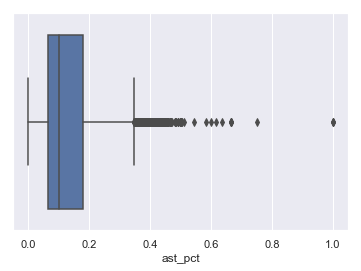

In [20]:
#ast_pct has a few obvious outliers that we will
#look to getting rid of
sns.boxplot(x=df['ast_pct'])


In [21]:
#Getting the Q1 and Q3 for the df to eliminate outliers. If the values
# we not in the IQR, then I plan on eliminating it from the dataset.
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

PlayerID         5572.000000
age                 6.000000
player_height      12.700000
player_weight      18.597272
gp                 42.000000
pts                 8.000000
reb                 2.900000
ast                 1.800000
net_rating          9.500000
oreb_pct            0.064000
dreb_pct            0.086000
usg_pct             0.068000
ts_pct              0.079000
ast_pct             0.113000
dtype: float64


In [22]:
df.shape

(11145, 20)

In [23]:
#If the data is not within a reasonagle amount from the IQR in any of the columns, then we are getting rid of it
#with the function.
#Goes from 11145 to 8735 values
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8735, 20)

,PlayerID,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
PlayerID,1.000000,-0.118459,-0.027410,-0.051745,-0.041853,0.041297,-0.000375,0.021431,0.008854,-0.173276,0.011681,-0.053647,0.206349,-0.023210
age,-0.118459,1.000000,-0.008386,0.058479,0.027050,-0.005450,0.011787,0.095977,0.135578,-0.076013,0.006321,-0.146668,0.019294,0.068213
player_height,-0.027410,-0.008386,1.000000,0.815251,0.017275,-0.029005,0.491258,-0.471681,0.004196,0.660924,0.689538,-0.110238,0.122179,-0.665981
player_weight,-0.051745,0.058479,0.815251,1.000000,0.022998,-0.040143,0.478028,-0.429188,0.006983,0.670611,0.672823,-0.096474,0.088759,-0.595419
gp,-0.041853,0.027050,0.017275,0.022998,1.000000,0.472505,0.426030,0.351647,0.243681,-0.022843,0.034585,0.081000,0.320609,0.070295
pts,0.041297,-0.005450,-0.029005,-0.040143,0.472505,1.000000,0.585059,0.618401,0.191498,-0.177055,-0.043689,0.628287,0.383325,0.190398
reb,-0.000375,0.011787,0.491258,0.478028,0.426030,0.585059,1.000000,0.164903,0.179596,0.467638,0.623819,0.161887,0.309487,-0.227961
ast,0.021431,0.095977,-0.471681,-0.429188,0.351647,0.618401,0.164903,1.000000,0.152291,-0.459540,-0.339543,0.332319,0.130407,0.781925
net_rating,0.008854,0.135578,0.004196,0.006983,0.243681,0.191498,0.179596,0.152291,1.000000,0.007285,0.021351,-0.028276,0.323297,0.011484
oreb_pct,-0.173276,-0.076013,0.660924,0.670611,-0.022843,-0.177055,0.467638,-0.459540,0.007285,1.000000,0.691655,-0.155194,0.070965,-0.528564


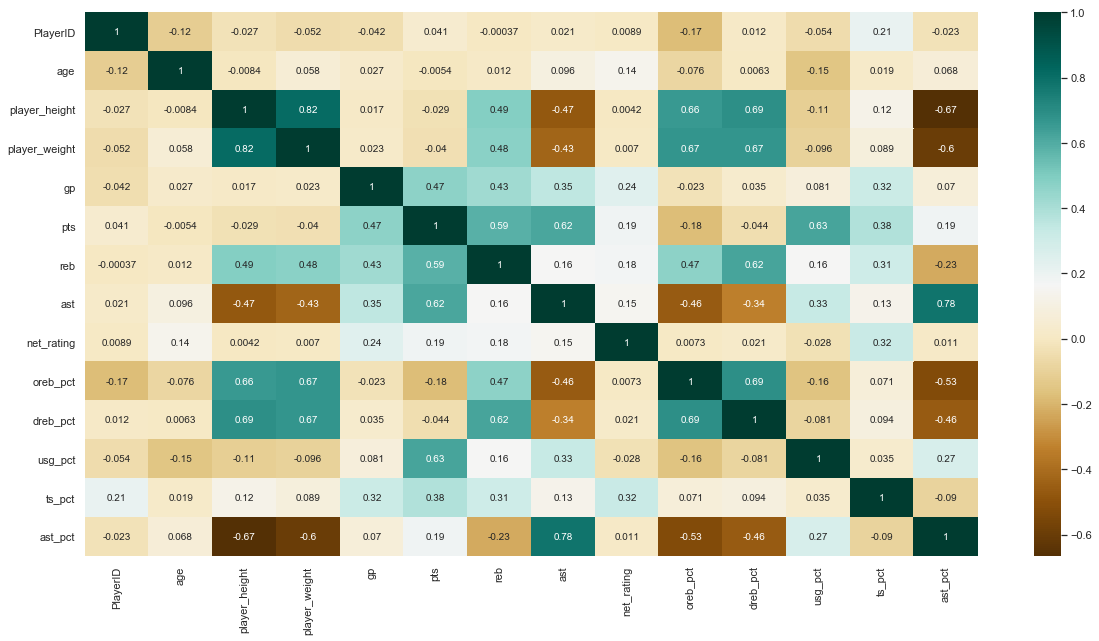

In [24]:
#The next step in our exploratory data analysis is to conduct a heatmap of
#to get the correlations between the columns. As expected, columns like height
#and weight are highly correlated. Points is more correlated with rebounds than any other variable
#which could imply that more athletic players who get more rebounds
#also get more points.
plt.figure(figsize=(20,10))
heatmap= df.corr()
sns.heatmap(heatmap,cmap="BrBG",annot=True)
heatmap

In [25]:
#df describes the dataset. It shows the mean, min, max and other 
#statistucaal summary variables that could be necessary in the data analyiss
df.describe()

,PlayerID,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000
mean,5560.530052,27.148254,201.210232,100.899068,54.590384,7.619977,3.391082,1.502873,-1.617287,0.055161,0.139064,0.180317,0.517792,0.116878
std,3196.144417,4.276576,8.495929,11.818426,22.372823,4.762773,1.972806,1.161063,6.507489,0.038209,0.051603,0.043201,0.055979,0.071290
min,1.000000,18.000000,177.800000,68.038800,1.000000,0.300000,0.000000,0.000000,-20.500000,0.000000,0.000000,0.050000,0.360000,0.000000
25%,2805.000000,24.000000,195.580000,92.986360,38.000000,3.900000,1.900000,0.600000,-6.000000,0.023000,0.098000,0.150000,0.483000,0.065000
50%,5577.000000,27.000000,203.200000,100.697424,59.000000,6.500000,3.000000,1.200000,-1.400000,0.044000,0.133000,0.179000,0.521000,0.098000
75%,8330.500000,30.000000,208.280000,108.862080,74.000000,10.300000,4.600000,2.100000,2.700000,0.084000,0.177000,0.210000,0.554500,0.154000
max,11144.000000,39.000000,226.060000,136.077600,85.000000,23.500000,9.000000,5.100000,17.200000,0.181000,0.311000,0.319000,0.675000,0.347000


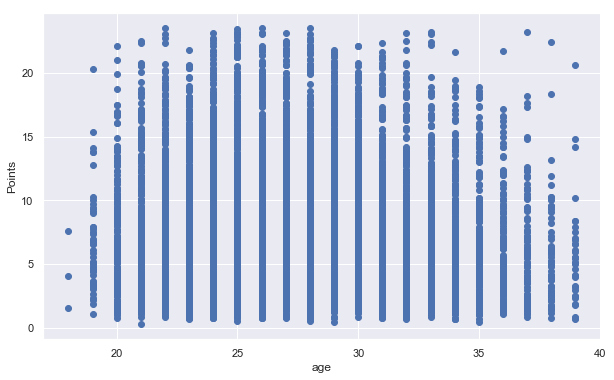

In [26]:
#The first data visualization that shows if there is a relationship
#between age and points. There is no clear pattern between age and the amount of points scored,
#so I would not expect that to be a factor in the model
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['age'], df['pts'])
ax.set_xlabel('age')
ax.set_ylabel('Points')
plt.show()

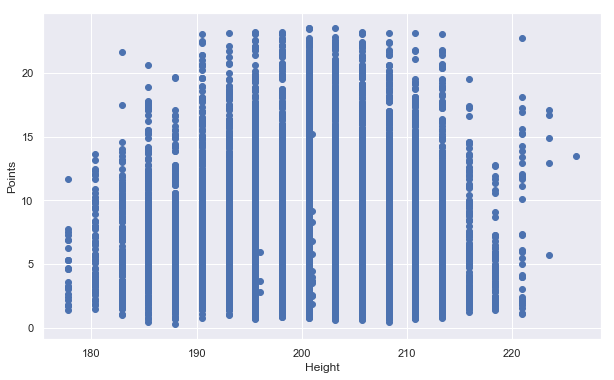

In [27]:
#The second graph that I wanted to see if height contributed to
#to the most points scored. There is a positive trend, as in the taller you are, the more 
#points that you would score. This could be a feature that could be used in the model
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['player_height'], df['pts'])
ax.set_xlabel('Height')
ax.set_ylabel('Points')
plt.show()

Text(0,0.5,'Frequency')

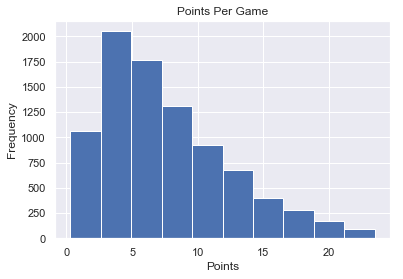

In [28]:
#This is just a frequency of points per game for every player
#in the dataset. Most players average under 10 points per game and 
#this is why I want to predict what players were predicted to go over 10 points per game.
fig, ax = plt.subplots()
# plot histogram
ax.hist(df['pts'])
# set title and labels
ax.set_title('Points Per Game')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

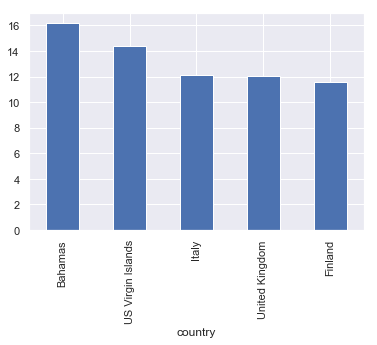

In [29]:
#This shows which country a players from and how many points they average during
#a season. Bahamas, Italy and UK average the most points. This could also
#be due to a lack of players.
df.groupby("country").pts.mean().sort_values(ascending=False)[:5].plot.bar()


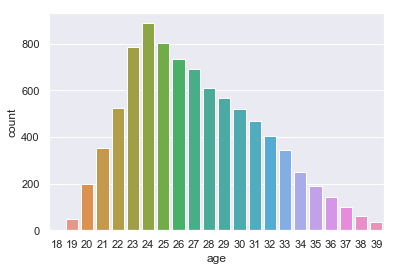

In [30]:
#This just shows a nice countplot of age which again shows that
#age is not a factor as most of the players are ages 24-30
sns.countplot(df['age'])


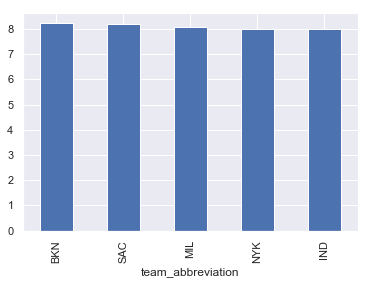

In [31]:
#This shows the teams that averages the most points in this dataset. 
#Overall, the Brooklyn Nets, Sacramento Kings, and Milwaukee Bucks
#have the most average points
df.groupby("team_abbreviation").pts.mean().sort_values(ascending=False)[:5].plot.bar()


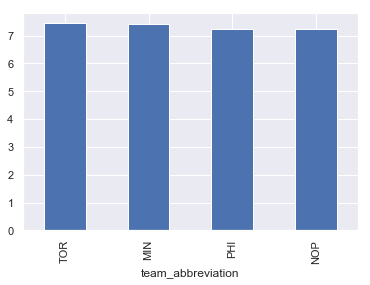

In [32]:
#This shows the teams that averages the least points in this dataset. 
#Overall, the Toronto Raptors, Minnesota Timberwolves, and Philadelphia 76ers.
#have the most average points
df.groupby("team_abbreviation").pts.mean().sort_values(ascending=False)[26:30].plot.bar()


In [33]:
#grouping by draft_year and getting the mean of points and usage percentage
df1=df.groupby(["draft_year"]).agg({"pts":'mean',"usg_pct":'mean'}).reset_index()
df1


,draft_year,pts,usg_pct
0,1979,0.800000,0.103000
1,1980,2.450000,0.141000
2,1981,4.522222,0.152667
3,1982,7.480000,0.236300
4,1983,5.873684,0.161789
5,1984,7.850000,0.175917
6,1985,7.834848,0.166606
7,1986,7.631707,0.182171
8,1987,7.784483,0.162828
9,1988,6.918447,0.167854


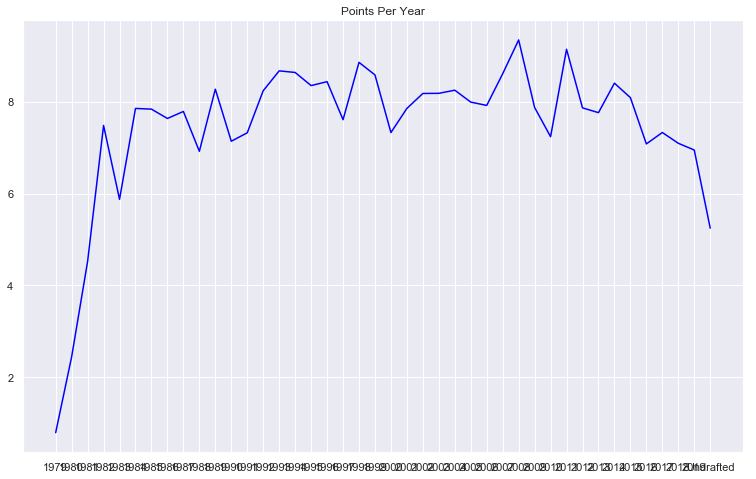

In [34]:
#plotting the points per draft class over time. There is a clear cyclical but is seems
#to be dippd down in recent years.
fig=plt.figure(figsize=(10,6))

ax1=fig.add_axes([0,0,1,1])


ax1.set_title("Points Per Year")

ax1.plot(df1['draft_year'],
         df1['pts'],
          color='blue')



plt.show()

In [35]:
#Our overall goal of this assignment is to predict whether a given player will average more than 10 points per game given their attributes
#Setting a 1 if points were above 10 and 0 if they were below 10
df['point']=[0 if x<10 else 1 for x in df['pts']]
#Creating an X dataframe from the original df in which the people who scored
#more than 10 points per game weere dropped.
X=df.drop('point',1)
#Y is just the point variable
Y=df.point



In [36]:
print(Y.head(200))

1      0
2      0
3      0
4      0
5      0
      ..
241    0
244    0
245    0
246    1
248    0
Name: point, Length: 200, dtype: int64


In [37]:
#testing out get dummies
print(X['team_abbreviation'].head(5))
print(pd.get_dummies(X['team_abbreviation'].head(5)))

1    LAC
2    TOR
3    DAL
4    MIA
5    HOU
Name: team_abbreviation, dtype: object
   DAL  HOU  LAC  MIA  TOR
1    0    0    1    0    0
2    0    0    0    0    1
3    1    0    0    0    0
4    0    0    0    1    0
5    0    1    0    0    0


In [38]:
#getting the amount of categories in each column to determine which features i want to change
for col_name in X.columns:
    if X[col_name].dtypes=='object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format
              (col_name=col_name,unique_cat=unique_cat))

Feature 'team_abbreviation' has 36 unique categories
Feature 'country' has 71 unique categories
Feature 'draft_year' has 42 unique categories
Feature 'draft_round' has 7 unique categories
Feature 'draft_number' has 71 unique categories
Feature 'season' has 24 unique categories


In [39]:
#changing the country to USA and Other to only have two categories
X['country'] =['USA' if x=="USA" else 'International' for x in X['country']]
print(X['country'].value_counts().sort_values(ascending=False))

USA              7368
International    1367
Name: country, dtype: int64


In [40]:
dummies=['country', 'team_abbreviation','draft_year','draft_round','draft_number',"season"]


In [41]:
#creating a function to using encoding (dummies) to all categorical variables.

def dummy(df,dummies):
    for x in dummies:
        dummie=pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df=df.drop(x,1)
        df=pd.concat([df,dummie],axis=1)
    return df

In [42]:
#applying it to our dataset, which creates a lot more columns
X=dummy(X,dummies)
print(X.head(5))

   PlayerID  age  player_height  player_weight  gp  pts  reb  ast  net_rating  \
1         1   28         215.90     117.933920  15  2.3  1.5  0.3        12.3   
2         2   39         205.74      95.254320   9  0.8  1.0  0.4        -2.1   
3         3   24         203.20     100.697424  64  3.7  2.3  0.6        -8.7   
4         4   34         205.74     108.862080  27  2.4  2.4  0.2       -11.2   
5         5   38         200.66      97.522280  52  8.2  2.7  1.0         4.1   

   oreb_pct  ...  season_2010-11  season_2011-12  season_2012-13  \
1     0.078  ...               0               0               0   
2     0.105  ...               0               0               0   
3     0.060  ...               0               0               0   
4     0.109  ...               0               0               0   
5     0.034  ...               0               0               0   

   season_2013-14  season_2014-15  season_2015-16  season_2016-17  \
1               0               0  

In [43]:
#using SimpleIMputer to get rid of the NA that may have formed when were
#transformed the dataset
import sklearn
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X=pd.DataFrame(data=imp.transform(X),columns=X.columns)

In [44]:
X

,PlayerID,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,...,season_2010-11,season_2011-12,season_2012-13,season_2013-14,season_2014-15,season_2015-16,season_2016-17,season_2017-18,season_2018-19,season_2019-20
0,1.0,28.0,215.90,117.933920,15.0,2.3,1.5,0.3,12.3,0.078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,39.0,205.74,95.254320,9.0,0.8,1.0,0.4,-2.1,0.105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,24.0,203.20,100.697424,64.0,3.7,2.3,0.6,-8.7,0.060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,34.0,205.74,108.862080,27.0,2.4,2.4,0.2,-11.2,0.109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,38.0,200.66,97.522280,52.0,8.2,2.7,1.0,4.1,0.034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,11140.0,28.0,208.28,108.862080,63.0,9.1,5.4,1.1,4.6,0.056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8731,11141.0,23.0,195.58,97.522280,15.0,1.2,0.3,0.1,-2.4,0.018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8732,11142.0,28.0,213.36,117.933920,49.0,6.1,5.1,1.1,5.6,0.029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8733,11143.0,27.0,208.28,104.779752,20.0,2.1,3.0,0.4,-16.4,0.085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
#splitting the dataset into a training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [46]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [47]:
import sklearn.feature_selection

In [48]:
#selecting which are the most important features in the model
#This is done by using the feature_selection tool from sklearn.
#This are the most important features.
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [163] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [49]:
#These reperesent the most importantn features to predict whether
# a player will score more than 10 points per game.
colnames_selected

['gp',
 'pts',
 'reb',
 'ast',
 'net_rating',
 'oreb_pct',
 'usg_pct',
 'ts_pct',
 'ast_pct',
 'draft_year_Undrafted',
 'draft_round_1',
 'draft_round_2',
 'draft_round_Undrafted',
 'draft_number_1',
 'draft_number_2',
 'draft_number_3',
 'draft_number_4',
 'draft_number_5',
 'draft_number_7',
 'draft_number_Undrafted']

In [51]:
#Before I run the model, I tried to scale the trianing and test
#dataset by using the StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [53]:
#Since the points varible is binary, I want to use a logistic regression
#predictions represent predictions and prob represents probabilities
lr=LogisticRegression()
lr.fit(X_train, y_train)
predictions=lr.predict(X_test)

prob=lr.predict_proba(X_test)

In [54]:
#The model scored very well with a score of .97939
score=lr.score(X_test,y_test)
print(score)

0.9793971766501335


In [55]:
#GridSearchCV implements a “fit” and a “score” method. #This helped imrobe the model
#as shown by the best_score below
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']
param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)
grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:  2.2min


Best Score:  1.0
Best Params:  {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.3min finished


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [57]:
#I am creating a confusion matrix with this code. There were
#1889 true negatives in this sample. There were also 678 true positives
#There were onlly  31 false negatives and 23 false positives.
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1889   23]
 [  31  678]]


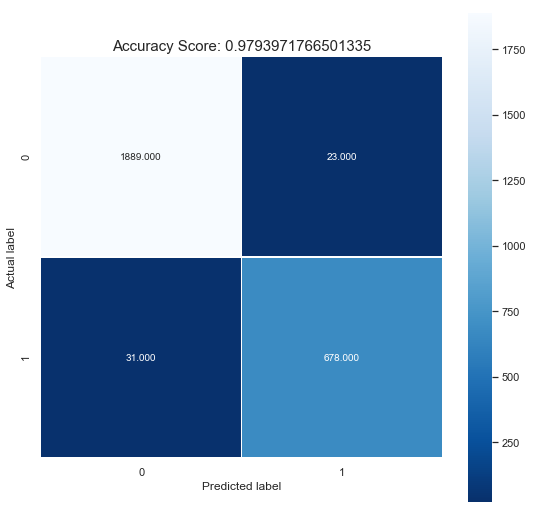

In [58]:

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [59]:
#This two scores show that the model worked well again. The r^2
#value was 0.9 which agains shows the validiyt of the logistical regression
print("Logistic regression r2 is ", round(r2_score(y_test, predictions), ndigits=2))
print("Logistic regression MSE is ", round(mean_squared_error(y_test, predictions), 2))



NameError: name 'r2_score' is not defined

In [60]:
#This function that I created just gets the auc (area under the curve)
#for the modfel ran previously
def model(X_train, y_train, X_test, y_test):
    model1 = LogisticRegression()
    model1.fit(X_train, y_train)
    y_pred= [x[1] for x in model1.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_pred)
    
    return auc

In [61]:
#The auc is very good in this model, which is consistent with the other tests that I ran
auc1=model(X_train_selected, y_train, X_test_selected, y_test)
print(auc1)


0.9995846881989483


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
#unpreprocessed data to see how much the model worsened without the
#precprocssing
df1 = df
df1 = df1.dropna(axis=0, how='any')

In [63]:
for col_name in df1.columns:
    if df1[col_name].dtypes not in ['int32','int64','float32','float64']:
        df1 = df1.drop(col_name, 1)

In [64]:
X1=df1.drop('point',1)
y1=df1.point

In [65]:
X1_train,X1_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3, random_state=42)

In [66]:
#The model improves by .01 in the auc curve measurement. This is not a lot but it could be significant 
#when dealing with them many players.
auc2=model(X1_train,y_train,X1_test,y_test)
print(auc2)

0.9988912724032316


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [68]:
#The classification reports again shows that the model was a good predictor of
#whether or not a player would score over time points per game
print(classification_report(y, lr.predict(X)))

NameError: name 'classification_report' is not defined

In [69]:
#Sorting the Y Dataframe
Y=Y.sort_values(ascending=False)

In [70]:
##using the regression to predict the entire X (the rest of the players)
y_pred=lr.predict(X)
Y=Y.sort_values(ascending=False)

In [71]:
#Creating a new data frame that shows the actual (whether the player
#scored more than ten points per game) and predicted.
df33=pd.DataFrame({'Actual':Y,'predicted': y_pred})

In [72]:
df33.sort_values(by='predicted',ascending=False)
df33.head(10)

,Actual,predicted
2341,1,1
6138,1,1
6051,1,1
3637,1,1
6114,1,1
6115,1,1
6145,1,1
6164,1,1
6160,1,1
6159,1,1


In [73]:
df33=df33.sort_index()

In [74]:
#The index in this was the playerID in the original dataframe, so making a new column ready to merge it
#with the playername
df33["PlayerID"] = df.index

In [75]:
df33

,Actual,predicted,PlayerID
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4
5,0,0,5
...,...,...,...
11140,0,0,11140
11141,0,0,11141
11142,0,0,11142
11143,0,0,11143


In [76]:
#Merging the two dataframe on PlayerID. Doing an inner join because some players weree eliminated from the sample becuase of outliers
result=pd.merge(df111, df33, on='PlayerID', how='inner')


In [78]:
result=result.sort_values(by='predicted',ascending=True)
result


,player_name,PlayerID,Actual,predicted
6476,Cody Zeller,8233,0,0
2236,Stacey Augmon,2874,0,0
2238,Shane Battier,2876,0,0
2239,Ryan Bowen,2877,0,0
2240,Ruben Patterson,2879,0,0
...,...,...,...,...
499,Reggie Miller,627,1,1
5121,CJ Miles,6511,1,1
5048,Darren Collison,6414,1,1
5129,Charlie Villanueva,6521,1,1


In [89]:
#Creating a range of mumbers 1-10 to use for the clustering model.
import numpy as np 
from sklearn.cluster import KMeans

def createList(r1, r2): 
    return np.arange(r1, r2+1, 1) 
      
# Driver Code 
r1, r2 = 1, 10
list=createList(r1, r2)

In [90]:
#This part of the code allows us to see the sum of square errors. You want to have a low SSE.
#As you can see in the graph as the segmenets that are added, the SSE improves.
#However, you have to account for some error within the code.
sse=[]


for k in list:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    

Text(0,0.5,'Sum of Squared Distance')

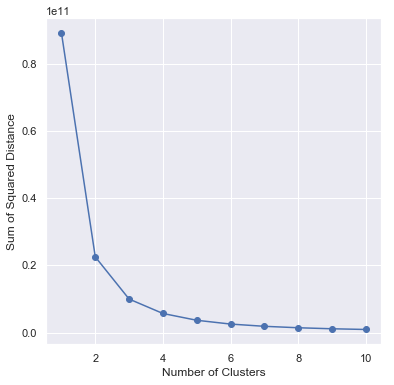

In [91]:
#Looking at the graph and accounting for the degree of error, it seems as
#three is a suitable amount of clusters.
plt.figure(figsize=(6,6))
plt.plot(list,sse,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')

In [92]:
#Using K-means clustering as my unsupervised model.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
#Creating a new columns that fits each player into a different cluster
X['cluster']= kmeans.fit_predict(X[X.columns[2:]])

In [94]:
#Making a new object with those values to create a new dataframe
clust=kmeans.fit_predict(X[X.columns[2:]])

In [95]:
#Creating a new dataframe to get the summary statistics of each clusters
y_clust=pd.DataFrame(np.vstack([clust,Y]).T, columns=["Cluster","Points"])

In [96]:
#There are most players in cluster zero. Cluster 1 has the least amount of players.
y_clust.groupby('Cluster')['Points'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2827.0,0.279802,0.448981,0.0,0.0,0.0,1.0,1.0
1,3245.0,0.268721,0.443363,0.0,0.0,0.0,1.0,1.0
2,2663.0,0.254976,0.435929,0.0,0.0,0.0,1.0,1.0


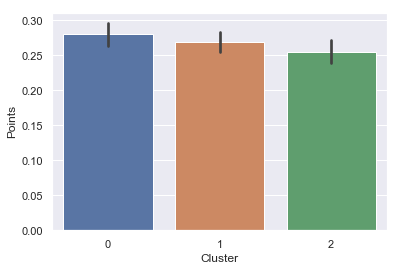

In [97]:
#Again this bargraph shows that cluster 1 scores the least number of points. Also
#if you dive deeper in. This is consistent with the regression because cluster 1
#is players who did not play that many games, and did not score more than 10 points per game
sns.barplot(x="Cluster",y="Points",data=y_clust)

In [88]:
X.to_csv('resultds.csv')

In [1065]:
X

,PlayerID,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,...,season_2011-12,season_2012-13,season_2013-14,season_2014-15,season_2015-16,season_2016-17,season_2017-18,season_2018-19,season_2019-20,cluster
0,1.0,28.0,215.90,117.933920,15.0,2.3,1.5,0.3,12.3,0.078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2.0,39.0,205.74,95.254320,9.0,0.8,1.0,0.4,-2.1,0.105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,24.0,203.20,100.697424,64.0,3.7,2.3,0.6,-8.7,0.060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4.0,34.0,205.74,108.862080,27.0,2.4,2.4,0.2,-11.2,0.109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5.0,38.0,200.66,97.522280,52.0,8.2,2.7,1.0,4.1,0.034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,11140.0,28.0,208.28,108.862080,63.0,9.1,5.4,1.1,4.6,0.056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
8731,11141.0,23.0,195.58,97.522280,15.0,1.2,0.3,0.1,-2.4,0.018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8732,11142.0,28.0,213.36,117.933920,49.0,6.1,5.1,1.1,5.6,0.029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
8733,11143.0,27.0,208.28,104.779752,20.0,2.1,3.0,0.4,-16.4,0.085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
